## 1. Exploration

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("datas/data.csv")

In [4]:
# Affichage des nombres de valeurs null
print("Nombre de valeurs null par colonne :\n", df.isnull().sum())

Nombre de valeurs null par colonne :
 OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
Se

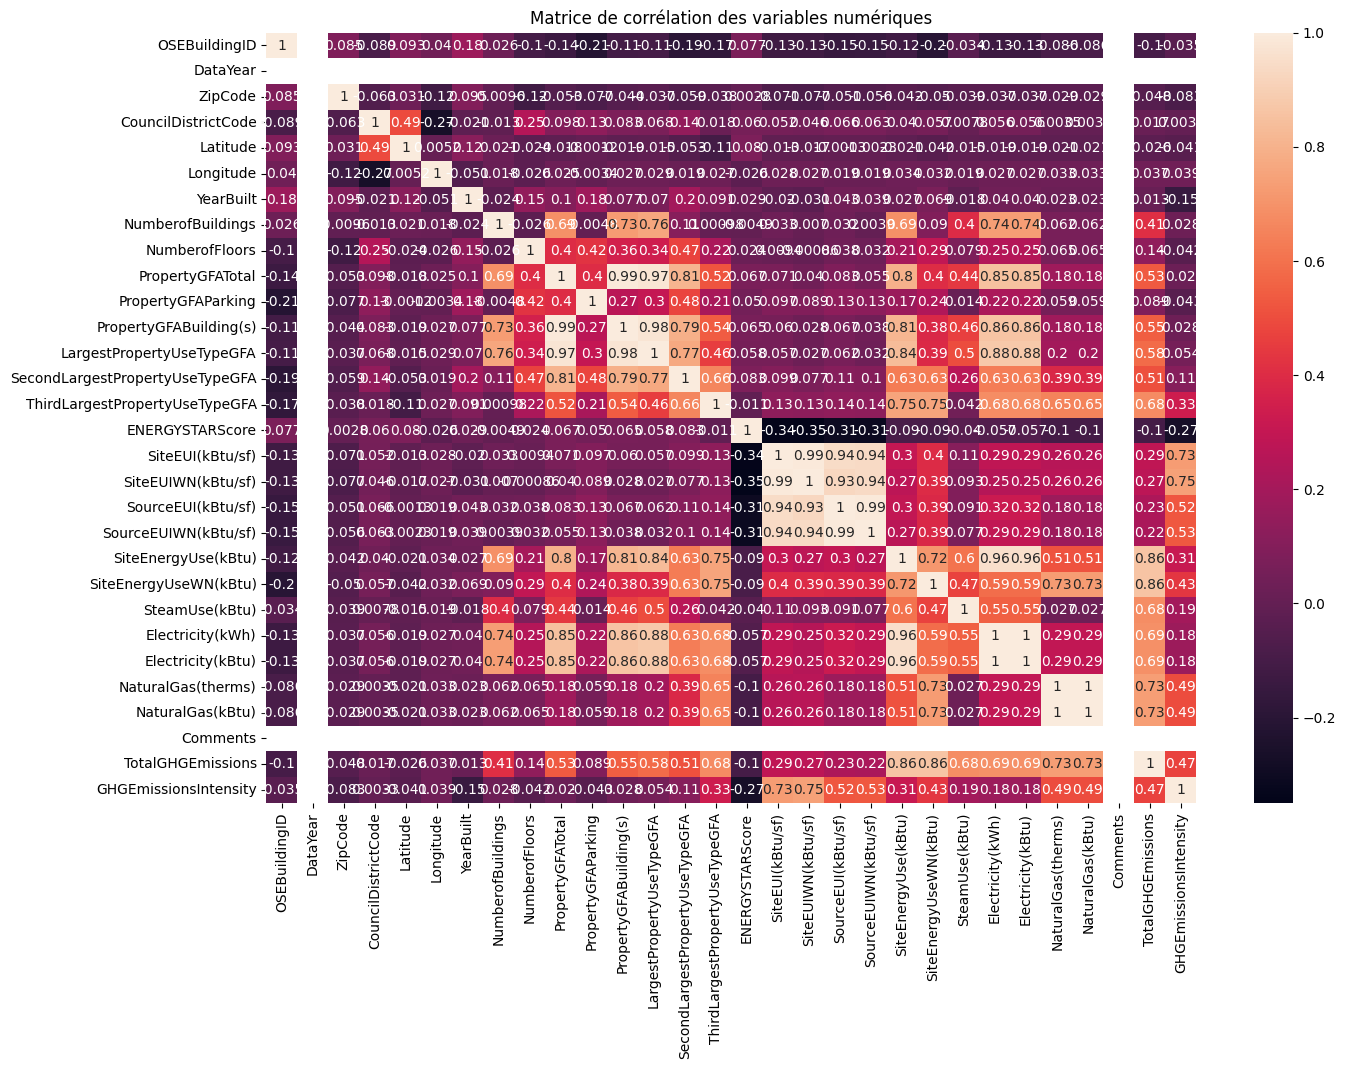

In [7]:
# Visualisation graphique des variables numériques
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [13]:
# # Visualisation graphique des variables qualitatives
# plt.figure(figsize=(20, 10))
# for i, col in enumerate(df.select_dtypes(include=['object']).columns, start=1):
#     plt.subplot(2, 3)
#     sns.countplot(data=df, x=col)
#     plt.title(f"Countplot de {col}")

# plt.tight_layout()
# plt.show()

In [14]:
# Affichage des pourcentages des valeurs null
print("Pourcentage de valeurs null par colonne :\n", (df.isnull().sum() / len(df)) * 100)


Pourcentage de valeurs null par colonne :
 OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            

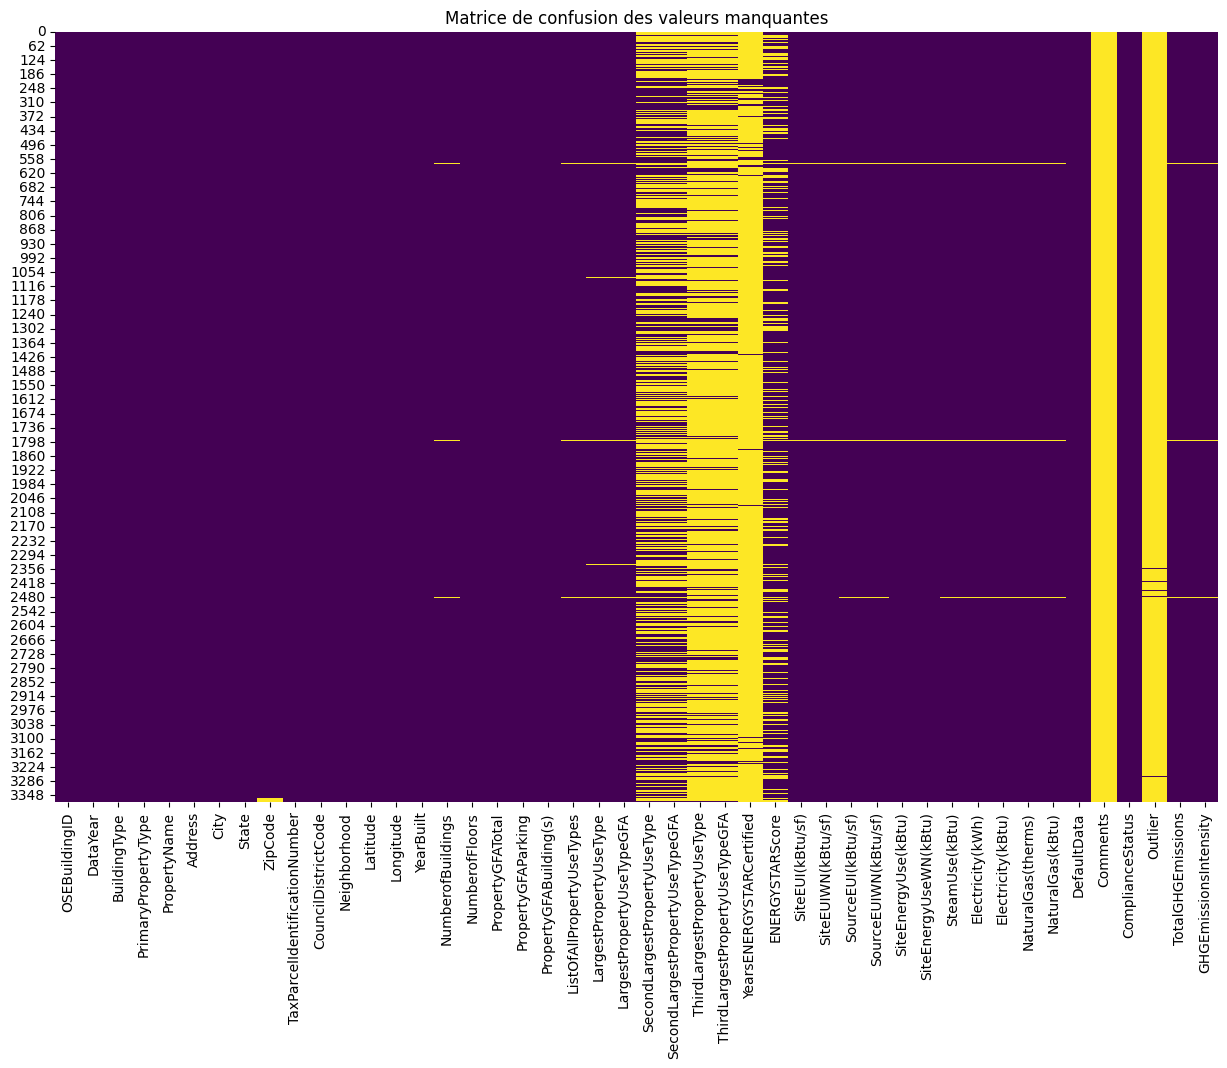

In [18]:
# Matrice de confusion des variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Matrice de confusion des valeurs manquantes")
plt.show()

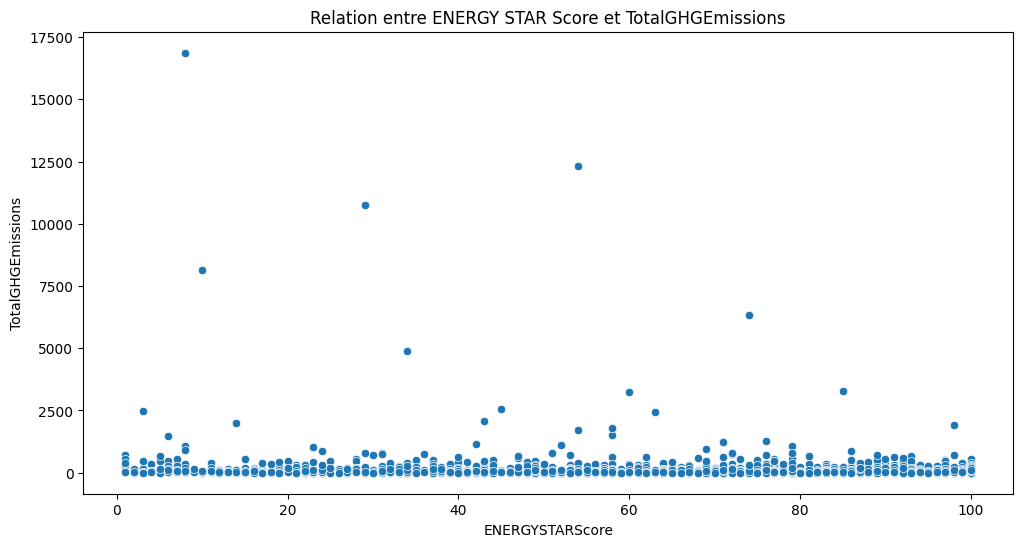

In [19]:
# Visualisation pour mettre en évidence l'importance de la variable ENERGY STAR Score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ENERGYSTARScore', y='TotalGHGEmissions')
plt.title("Relation entre ENERGY STAR Score et TotalGHGEmissions")
plt.show()

## 2. Nettoyage

In [20]:
# Suppressions des colonnes impertinentes
columns_to_drop = [
    'DataYear', 'City', 'State', 'ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude',
    'PropertyGFAParking', 'PropertyGFABuilding(s)', 'YearsENERGYSTARCertified',
    'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
    'Electricity(kWh)', 'NaturalGas(therms)', 'Comments', 'ComplianceStatus', 'Outlier'
]
df.drop(columns=columns_to_drop, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   TaxParcelIdentificationNumber    3376 non-null   object 
 6   Neighborhood                     3376 non-null   object 
 7   YearBuilt                        3376 non-null   int64  
 8   NumberofBuildings                3368 non-null   float64
 9   NumberofFloors                   3376 non-null   int64  
 10  PropertyGFATotal                 3376 non-null   int64  
 11  ListOfAllPropertyUseTypes        3367 non-null   object 
 12  LargestPropertyUseTy

In [22]:
# Suppression des bâtiments résidentiels
residential_types = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']
df = df[~df['BuildingType'].isin(residential_types)]

In [23]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [24]:
# Suppression des valeurs dupliquées
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [26]:
# Remplacement des valeurs null par la moyenne pour les valeurs numériques
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = SimpleImputer(strategy='mean').fit_transform(df[numerical_columns])

In [27]:
# Remplacement des valeurs null par le mode pour les variables qualitatives
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_columns])

In [28]:
df.isnull().sum()

OSEBuildingID                      0
BuildingType                       0
PrimaryPropertyType                0
PropertyName                       0
Address                            0
TaxParcelIdentificationNumber      0
Neighborhood                       0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
ListOfAllPropertyUseTypes          0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
SourceEUIWN(kBtu/sf)               0
SiteEnergyUseWN(kBtu)              0
Electricity(kBtu)                  0
NaturalGas(kBtu)                   0
DefaultData                        0
TotalGHGEmissions                  0
GHGEmissionsIntensity              0
d

In [29]:
# Remplacement par 0 pour les valeurs négatives pour les variables numériques
negative_columns = df.select_dtypes(include=['number']).columns
df[negative_columns] = df[negative_columns].apply(lambda x: x.clip(lower=0))

In [30]:
# Encodage des variables qualitatives par OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_columns)],
    remainder='passthrough'
)

In [31]:
df_encoded = pd.DataFrame(preprocessor.fit_transform(df))

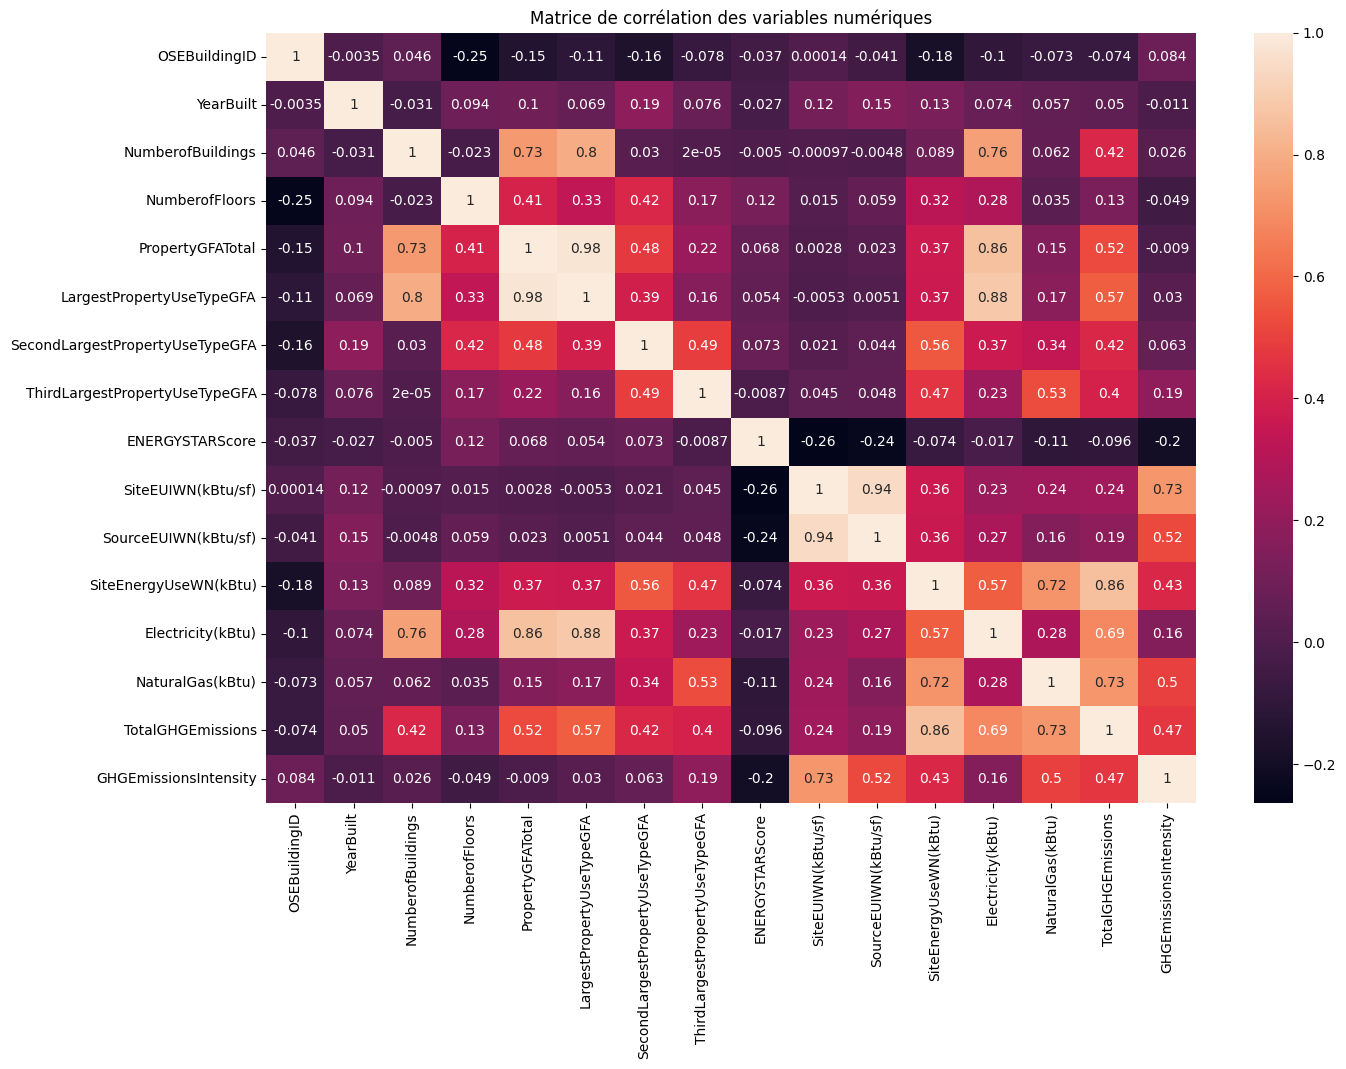

In [33]:
# Visualisation générale après le nettoyage


plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

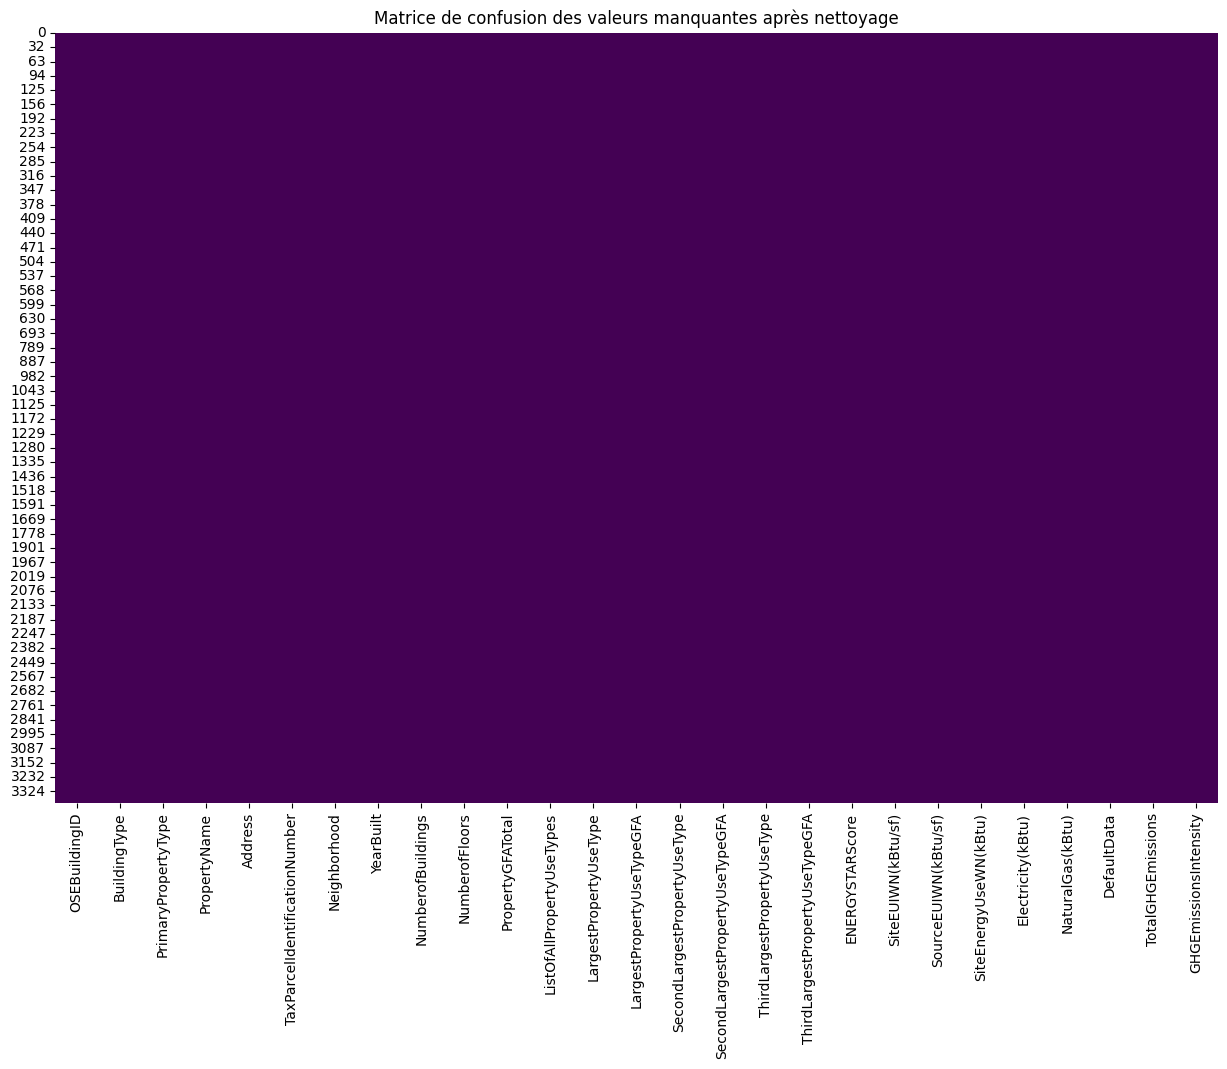

In [34]:
cleaned_missing_matrix = df.isnull()

# Création de la figure
plt.figure(figsize=(15, 10))

# Utilisation de heatmap pour afficher la matrice de confusion après nettoyage
sns.heatmap(cleaned_missing_matrix, cbar=False, cmap='viridis')

# Ajout du titre
plt.title("Matrice de confusion des valeurs manquantes après nettoyage")

# Affichage de la figure
plt.show()

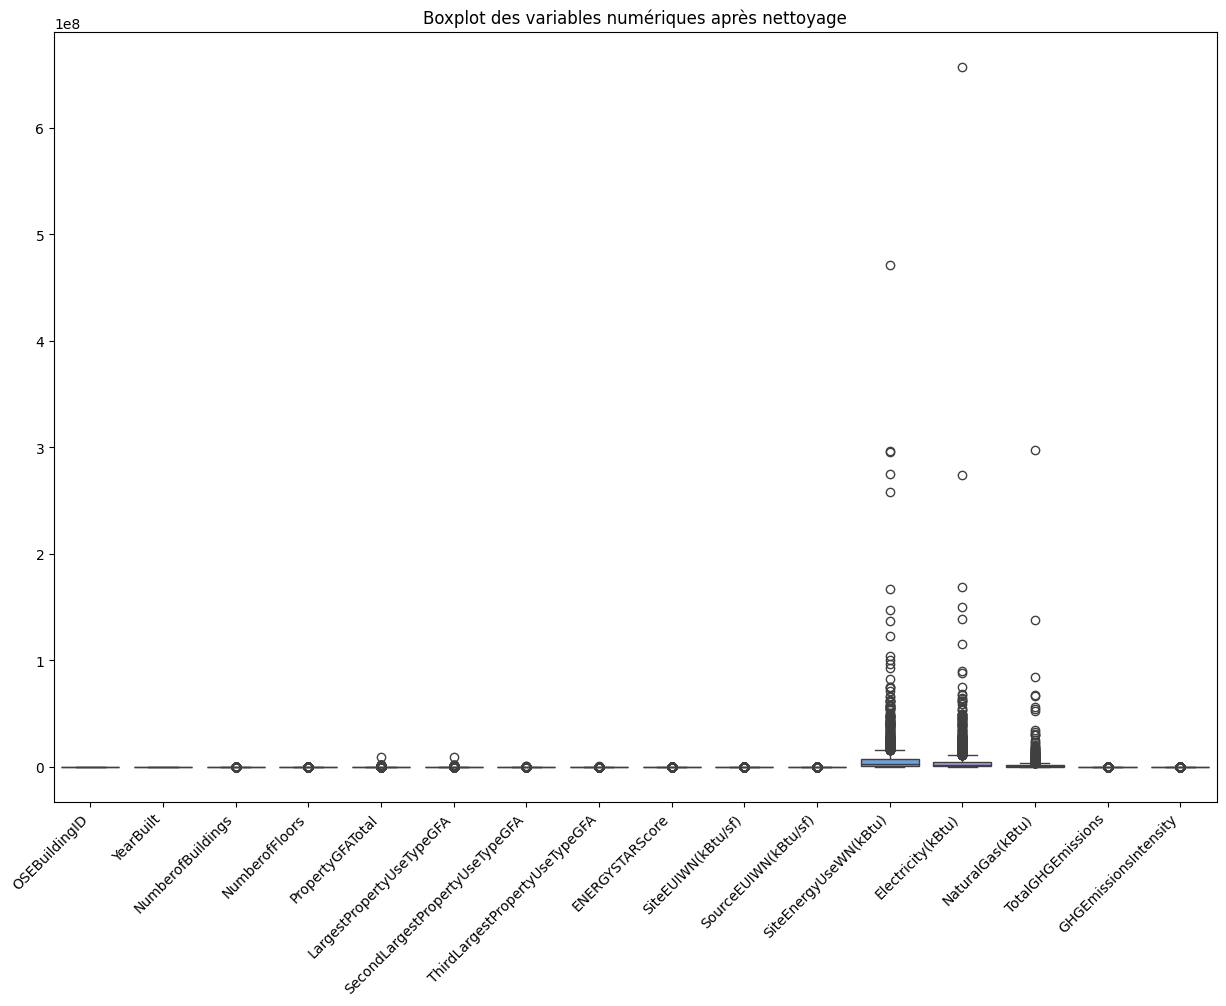

In [35]:
numerical_columns = df.select_dtypes(include=['number'])

# Création de la figure
plt.figure(figsize=(15, 10))

# Utilisation de boxplot pour chaque variable numérique
sns.boxplot(data=numerical_columns)

# Ajout du titre
plt.title("Boxplot des variables numériques après nettoyage")

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage de la figure
plt.show()

In [36]:
df.to_csv('data_clean.csv', index=False)